# Form to string

In [1]:
import pandas as pd

## Loading icebreakers_extract.csv as a pandas dataframe

In [2]:
df = pd.read_csv("./data/icebreakers_extract.csv")
df

,title,price,questions,advisor_id,deleted_at,user_skill_id,preview_media_url,icebreaker_type,allow_quantity,share_allowed_org,share_allowed_platform,description,locale,icebreaker_translations
0,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":92540555320,""body"":{""body"":""What is you...",1,NaN,2,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
1,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":81797796808,""body"":{""body"":""What is you...",1,NaN,2,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
2,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":38078152200,""body"":{""body"":""What is you...",1,NaN,2,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
3,Return Journey Planning - Eligibility & Legal ...,NaN,"[{""id"":35844159078,""body"":{""body"":""What is you...",1,NaN,8,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3
4,Financial Recovery Aid Applications,NaN,"[{""id"":10699678759,""body"":{""body"":""What is you...",1,NaN,39,NaN,1,0,0,0,This questionnaire helps NGO counselors assess...,en,3


### Droping irrelevant columns¶

In [3]:
to_drop = ['advisor_id', 
           'deleted_at', 
           'user_skill_id', 
           'preview_media_url', 
           'icebreaker_type', 
           'allow_quantity', 
           'share_allowed_org', 
           'share_allowed_platform', 
           'locale', 
           'icebreaker_translations',
          'price']

df.drop(columns=to_drop, inplace=True)
df

,title,questions,description
0,Return Journey Planning - Eligibility & Legal ...,"[{""id"":92540555320,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
1,Return Journey Planning - Eligibility & Legal ...,"[{""id"":81797796808,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
2,Return Journey Planning - Eligibility & Legal ...,"[{""id"":38078152200,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
3,Return Journey Planning - Eligibility & Legal ...,"[{""id"":35844159078,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...
4,Financial Recovery Aid Applications,"[{""id"":10699678759,""body"":{""body"":""What is you...",This questionnaire helps NGO counselors assess...


#### for a comparison of row 0 vs 1 vs 2 vs 3, kindly see `protoype_data_analysis_&_agent_development.ipynb` -> *initial comparison of question dicts*

Questions and answers are the same, ids etc can be d/f.

#### Form - Return Journey Planning - Eligibility & Legal Requirements

In [72]:
import json
import re

string_form = ""
question_number = 0
skip            = False
for i in json.loads(df['questions'][0]):
    question_number+=1
    current_string  = i['body']['body']

    if question_number>=18:
        current_string  = re.sub(r'\s*\(PII\)', '', current_string)
        current_list    = re.split(r'[:|]', current_string)
        current_list[0] = "Q" + str(question_number) + ": " + current_list[0] + ' (PII) ' + '?'
        skip            = True

    if skip == False:
        current_list    = re.split(r'[:|]', current_string)
        current_list[0] = "Q" + str(question_number) + ": " + current_list[0] + '?'
    for i,j in enumerate(current_list):
        if i!=0:
            # removing the first white space
            current_list[i] = current_list[i][1:]
            current_list[i] = str(i) + '. ' + current_list[i]
            
        string_form = string_form + current_list[i] + '\n'
        # print(current_list[i])
    string_form+='\n\n'
    # print()




In [79]:
# print(string_form)

In [74]:
# # Save to a text file
# with open("return_journey_planning_eligibility_nd_legal_requirements.txt", "w", encoding="utf-8") as f:
#     f.write(string_form)


In [ ]:
# Q6
# Abmeldung in Germany means deregistering your address when you move out or leave the country.
# You must inform the local office (Bürgeramt or Einwohnermeldeamt) that you no longer live at your German address.
# Afterward, you get a deregistration certificate, which helps you cancel contracts, insurance, or services.
# This should be done shortly before or within about two weeks after leaving your home in Germany.


In [4]:
# Load the .txt file as a string
with open("./data/return_journey_planning_eligibility_nd_legal_requirements.txt", "r", encoding="utf-8") as file:
    form_str = file.read()

# # Now text_data contains the whole file as a string
# print(text_data)  # Print first 500 characters to check


#### Form - 'Financial Recovery Aid Applications'

In [4]:
# import json
# import re

# string_form = ""
# question_number = 0
# skip            = False
# for i in json.loads(df['questions'][4]):
#     question_number+=1
#     current_string  = i['body']['body']

#     if question_number>=23:
#         current_string  = re.sub(r'\s*\(PII\)', '', current_string)
#         current_list    = re.split(r'[:|]', current_string)
#         current_list[0] = "Q" + str(question_number) + ": " + current_list[0] + ' (PII) ' + '?' + '\n' + '1.'
#         skip            = True

#     if skip == False:
#         current_list    = re.split(r'[:|]', current_string)
#         current_list[0] = "Q" + str(question_number) + ": " + current_list[0] + '?'
#     for i,j in enumerate(current_list):
#         if i!=0:
#             # removing the first white space
#             current_list[i] = current_list[i][1:]
#             current_list[i] = str(i) + '. ' + current_list[i]
            
#         string_form = string_form + current_list[i] + '\n'
#         # print(current_list[i])
#     string_form+='\n\n'
#     # print()




In [81]:
# print(string_form)

In [69]:
# # Save to a text file
# with open("financial_recovery_aid_applications.txt", "w", encoding="utf-8") as f:
#     f.write(string_form)


# Agent Development

In [17]:
from langgraph.graph import START, END, MessagesState, StateGraph
from langchain_core.runnables import RunnableConfig
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage, convert_to_messages, BaseMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import Optional, Literal, Annotated, List, Dict, Any
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langgraph.types import StreamWriter
from langgraph.graph.message import add_messages

# from core import get_model, settings

import os
from dotenv import load_dotenv
load_dotenv()

# Access API keys and credentials
OPENAI_API_KEY    = os.environ["OPENAI_API_KEY"]
GEMINI_API_KEY    = os.environ["GEMINI_API_KEY"]
# TIMESCALE_DB_URI  = os.environ["TIMESCALE_DB_URI"]
# MAIN_AGENT_DB_URI = os.environ["MAIN_AGENT_DB_URI"]
# TAVILY_API_KEY    = os.environ["TAVILY_API_KEY"]





#--------------------------------------- SCHEMAS ---------------------------------------

class GradeRelevance(BaseModel):
    binary_score: Literal["yes", "no"] = Field(
        description=(
            "Is the user's message relevant to Refugee_Bridge support for using the wcr.is website or completing its forms (including greetings while using the service)? 'yes' or 'no'."
        )
    )

RELEVANCE_SYSTEM_MESSAGE = """
You are `ask ai`, an assistant for refugees using the wcr.is website. The site has multiple forms; users pick the one matching their current need and fill it out in another tab. While completing a form, they may ask about words, legal terms, or any confusing part. Your job is to guide them so they can finish the form correctly.

TASK: Decide if the user's message is relevant to Refugee_Bridge assistance. Return ONLY a binary score: 'yes' or 'no'.

Mark as 'yes' if the message concerns: using wcr.is; choosing/finding the right form; understanding or answering form questions (You do not have access to the form itself, so you must infer. If the message appears to come from a user filling out a form and asking about something within it, classify as 'yes'.); definitions of legal/immigration terms; document requirements; site navigation or technical issues; or general greetings/openers while using the service. Do NOT classify greetings as 'no'.

Mark as 'no' only if the message is clearly unrelated to refugee support or the wcr.is forms.
"""

RELEVANCE_GRADER_PROMPT = ChatPromptTemplate.from_messages([
    ("system", RELEVANCE_SYSTEM_MESSAGE),
    ("human",  "The user's message:\n{query}")
])



class AgentState(BaseModel):
    """
    Main state for the LangGraph Agent.

    Attributes are self documented.
    """
    messages: Annotated[List[BaseMessage], add_messages] = Field(default_factory=list)
    
    context_form: Optional[str] = Field(
        default     = None,
        title       = "Context Form",
        description = (
            "Full STRING of the current form being filled by the user. "
            "Set to None when no form is active."
        ),
    )
    
    user_question:  Optional[str] = Field(
        default     = None,
        title       = "User Question",
        description = ("The crrent question that the user has asked."),
    )
    
    cant_help_text: str = Field(
        default     = "Sorry, I cannot help you in this matter.",
        title       = "Cannot Help Text",
        description = ("A Predefined Text. If the user's question is not related to refugee help. This predefined text is streamed"),
    )


    






#--------------------------------------- NODES ---------------------------------------
# - IMPORTANT!: Always check the `Human Message`.
#     - If it is written in a language other than English, reply in that same language.
#     - If it is a mix of English and another language, reply in the non-English language.

def last_human_text(messages: List[BaseMessage]) -> Optional[str]:
    for msg in reversed(messages):
        if isinstance(msg, HumanMessage):
            return msg.content
    return None

def trim_messages(messages: List[BaseMessage], max_messages: int = 8) -> List[BaseMessage]:
    return messages[-max_messages:]

async def query_relevance(state: AgentState, config: RunnableConfig) -> AgentState:
    msgs = trim_messages(state.messages)
    text = last_human_text(msgs) or ""
    return {"user_question": text}



async def query_relevance_router(state: AgentState, config: RunnableConfig) -> Literal["cant_help", "acall_model"]:
    user_question = state.user_question or ""
    if VERBOSE:
        print("---CHECK RELEVANCE---")

    llm = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash-lite",
        api_key=GEMINI_API_KEY,
        temperature=0,
        max_output_tokens=200,
    )

    grader = (RELEVANCE_GRADER_PROMPT | llm.with_structured_output(GradeRelevance)).with_config(tags=["skip_stream"])
    relevance_grade: GradeRelevance = await grader.ainvoke({"query": user_question})

    score = (relevance_grade.binary_score or "").strip().lower()
    return "acall_model" if score == "yes" else "cant_help"





        
async def cant_help(state: AgentState, config: RunnableConfig, writer: StreamWriter) -> AgentState:  # writer auto-injected
    for word in state.cant_help_text.split():
        writer(word + ' ')
    return {"messages": [AIMessage(content=state.cant_help_text)]}






MODEL_SYSTEM_MESSAGE = """
Your name is `ask ai`. You are a kind, patient assistant for refugees using the wcr.is website.

The site has multiple forms.
The user chooses the form that matches their current need.
They fill out the form in another tab, not in this chat.
While completing it, they may ask you about words, legal terms, or any confusing part.
Your job is to guide them so they can finish the form correctly.

How to respond:
- The user has selected <user_language> {user_language} </user_language> language. So your response should be in <user_language> {user_language} </user_language> language.
- Be very polite and supportive.
- Use short sentences.
- Use simple, everyday language.
- Explain step by step.
- Focus on the exact question the user is stuck on.
- Give short examples when helpful.
- If you need details, ask one clear question at a time.
- Adjust your tone and explanation style to fit the person you’re talking to.
    - If the person is not well-educated, avoid technical terms. Use simple words and short sentences.
    - If the person seems to be in trauma, respond with care, love, and support. Focus on uplifting their spirit.
    - Infer the person’s eloquence based on how their question is written. 
        - If the question is unclear or sloppy: use simpler language, slow down, and give more (and more concrete) examples.
        - If the question is eloquent and precise: be succinct and get straight to the point, with minimal examples.

- Name of the form is given below. Always tell the user that you are currently helping with this form.

Current form:
<form>
{form_str}
</form>
"""


def get_cfg(config: RunnableConfig) -> Dict[str, Any]:
    return (config or {}).get("configurable", {})  # type: ignore

async def acall_model(state: AgentState, config: RunnableConfig) -> AgentState:
    cfg = get_cfg(config)
    user_language = cfg.get("user_language", "English")
    form_str = cfg.get("form_str", "—")

    model = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash-lite",
        api_key=GEMINI_API_KEY,
        temperature=0,
        max_output_tokens=1000,  # <-- correct param name
    )

    system_msg = MODEL_SYSTEM_MESSAGE.format(
        form_str=form_str,
        user_language=user_language,
    )

    messages = [SystemMessage(content=system_msg)] + trim_messages(state.messages)
    response = await model.ainvoke(messages, config=config)
    return {"messages": [response]}



# -------------------------
# BUILD THE GRAPH
# -------------------------
# builder = StateGraph(AgentState, config_schema=GraphConfig) ##################################################################################
builder = StateGraph(AgentState)
builder.add_node("query_relevance", query_relevance)
builder.add_node("acall_model", acall_model)
builder.add_node("cant_help", cant_help)

builder.set_entry_point("query_relevance")
builder.add_edge("cant_help", END)
builder.add_edge("acall_model", END)
builder.add_conditional_edges(source="query_relevance", path=query_relevance_router, path_map=["cant_help", "acall_model"])

# Compile with an in-memory checkpointer; resume by calling invoke() on the same thread_id
checkpointer = MemorySaver()

# Compile the graph with persistent checkpointer and in-memory store
graph = builder.compile(checkpointer=checkpointer)# store=across_thread_memory)



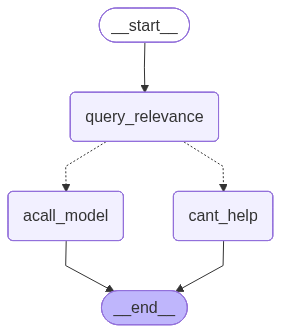

In [36]:
from IPython.display import Image, display
# View

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except:
    print(graph.get_graph().draw_ascii(), '\n\n')
    # print(graph.get_graph().draw_mermaid())


In [21]:
VERBOSE = True

import uuid

user_language = 'english'
config = {
    "configurable": {
        "user_id":'Frank',
        "thread_id": str(uuid.uuid4()),
        "form_str": form_str,
        "user_language": user_language,
    }
}

# 'что такое амбельдунг?'

text=HumanMessage(content='cigarettes')
# Kick off (provide initial state once)
output = await graph.ainvoke({"messages": [text]}, config=config)
for msg in output['messages']:
    msg.pretty_print()


---CHECK RELEVANCE---
================================ Human Message =================================

cigarettes
================================== Ai Message ==================================

Sorry, I cannot help you in this matter.


In [22]:
VERBOSE = True

import uuid

user_language = 'english'
config = {
    "configurable": {
        "user_id":'Frank',
        "thread_id": str(uuid.uuid4()),
        "form_str": form_str,
        "user_language": user_language,
    }
}

# 'что такое амбельдунг?'

text=HumanMessage(content='ambeldung meaning?')
# Kick off (provide initial state once)
output = await graph.ainvoke({"messages": [text]}, config=config)
for msg in output['messages']:
    msg.pretty_print()


---CHECK RELEVANCE---
================================ Human Message =================================

ambeldung meaning?
================================== Ai Message ==================================

I am here to help you with the "Return Journey Planning Eligibility And Legal Requirements Form".

You asked about "Abmeldung".

Abmeldung in Germany means deregistering your address. It's what you do when you move out or leave the country. You tell the local office that you no longer live at your address.

Do you have any other questions about this?
